<h1 style="font-size:30px">Data Cleaning</h1>
<hr>

1. Drop unwanted observations
2. Fix structural erros
3. Remove unwanted outliers
4. Label missing categorical data
5. Flag and fill missing numerical data

<span style="font-size:18px">**Import libraries**</span>

In [1]:
# Numpy for numerical computing
import numpy as np

# Pandas for Dataframes
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplolib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

<span style="font-size:18px">**Load dataset**</span>

In [2]:
df = pd.read_csv('diamonds.csv')

<span style="font-size:18px">**1. Drop unwanted observations**</span><br>
* Duplicate observations<br>
* Irrelevant observations: observations that don't actually fit the **specific problem**

In [3]:
# Drop duplicates
df.drop_duplicates().shape

(53940, 11)

<span style="font-size:18px">**2. Fix structural errors**</span>

<span style="font-size:14px">**2.1. Wannabe indicator variables**<br></span>
Check variables that should actually be binary indicator variables.<br>
* These variables should be either 0 or 1
* Maybe they are saved under different logic
* Fill missing values 'nan' with the value 0 to turn the feature into a true indicator variable

<span style="font-size:14px">**2.2. Typos, capitalization and misslabeled classes**<br></span>
* Mostly a concern for **categorical features**<br>
* Check for typos or inconsistent capitalization<br>
* Check for classes that are labeled as separate classes when they should really be the same

<span style="font-size:18px">**3. Remove unwanted outliers**</span><br>
* Suspicious measurements that are unlikely to be real data<br>
* Outliers that belong in a different population<br>
* Outliers that belong to a different problem

* Is there any long and skinny tail?
* Is it a potential outlier?

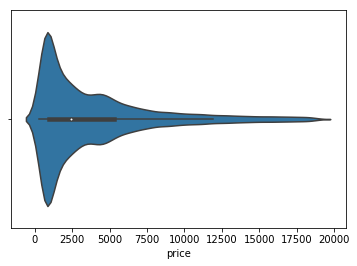

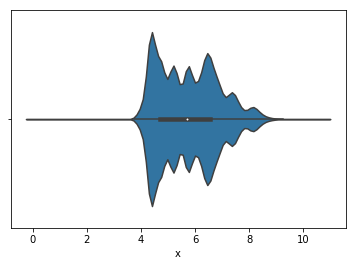

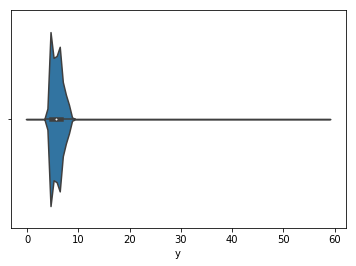

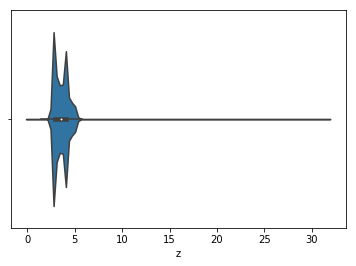

In [4]:
# Violin plot of 'target' using the Seaborn library
sns.violinplot(df.price)
plt.show()

# Violin plot of 'feature'
sns.violinplot(df.x)
plt.show()

sns.violinplot(df.y)
plt.show()

sns.violinplot(df.z)
plt.show()

* Check the smaller/largest 5 lot size just to confirm
* Use a boolean mask to filter only wanted observations

In [5]:
# Sort the df.feature and display the low 5 samples
print(df.x.sort_values(ascending = False).tail())

# Sort the df.feature and display the low 5 samples
print(df.y.sort_values(ascending = False).tail())

# Sort the df.feature and display the low 5 samples
print(df.z.sort_values(ascending = False).tail())

49557    0.0
15951    0.0
27429    0.0
26243    0.0
49556    0.0
Name: x, dtype: float64
24520    0.0
49557    0.0
11963    0.0
26243    0.0
49556    0.0
Name: y, dtype: float64
15951    0.0
26123    0.0
26243    0.0
27503    0.0
11182    0.0
Name: z, dtype: float64


In [6]:
# Remove feature outlier
df = df[(df[['x']] != 0).all(axis = 1)]
df = df[(df[['y']] != 0).all(axis = 1)]
df = df[(df[['z']] != 0).all(axis = 1)]

# Print length of df
print(len(df))

53920


<span style="font-size:18px">**4. Label missing categorical data**</span><br><br>
Avoid:<br>
* **Dropping** observations that have missing values<br>
* **Imputing** the missing values based on values from other observations

<span style="font-size:18px">**5. Flag and fill missing numeric data**</span><br>
* Best used for **cross-sectional** data. The cross-sectional data is data collected for many subjects at the same point in time
* For time series, consider **interpolation**. The time series data is data collected for one subject throughout many points in time

<span style="font-size:18px">**6. Save the cleaned dataframe**</span><br>

In [7]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index = None)